<a href="https://colab.research.google.com/github/rahul-727/BH-task2/blob/main/movie_recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Load datasets

In [ ]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
print("Missing values in movies dataset:")
print(movies.isnull().sum())
print("\nMissing values in ratings dataset:")
print(ratings.isnull().sum())

Missing values in movies dataset:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings dataset:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [ ]:
print("\nDuplicate entries in movies dataset:", movies.duplicated().sum())
print("Duplicate entries in ratings dataset:", ratings.duplicated().sum())


Duplicate entries in movies dataset: 0
Duplicate entries in ratings dataset: 0


Number of users: 610
Number of movies: 9742


<Axes: xlabel='rating'>

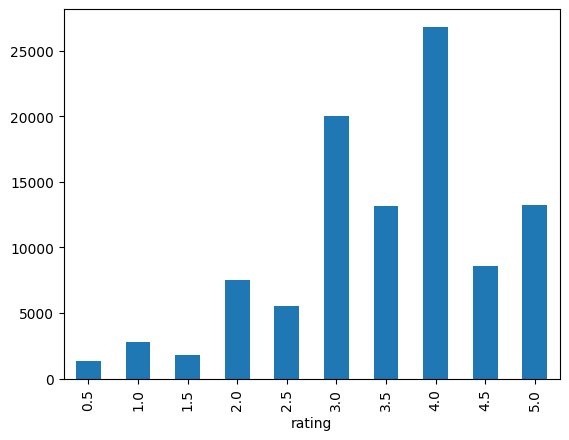

In [ ]:
# Number of unique users and movies
num_users = ratings['userId'].nunique()
num_movies = movies['movieId'].nunique()

print(f"Number of users: {num_users}")
print(f"Number of movies: {num_movies}")

# Ratings distribution
ratings['rating'].value_counts().sort_index().plot(kind='bar')

# Recommendation Model

In [ ]:
# Load the data into Surprise format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Use the SVD algorithm
algo = SVD()

# Run cross-validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8719  0.8716  0.8787  0.8702  0.8824  0.8750  0.0047  
MAE (testset)     0.6720  0.6678  0.6762  0.6667  0.6776  0.6720  0.0044  
Fit time          1.78    1.71    1.91    2.59    1.76    1.95    0.33    
Test time         0.14    0.37    0.22    0.38    0.14    0.25    0.11    


{'test_rmse': array([0.87188411, 0.87162016, 0.87871477, 0.87018107, 0.88238675]),
 'test_mae': array([0.67197883, 0.6677672 , 0.67615118, 0.66670534, 0.67762413]),
 'fit_time': (1.7770302295684814,
  1.7102916240692139,
  1.9096355438232422,
  2.594912052154541,
  1.7627441883087158),
 'test_time': (0.1429603099822998,
  0.3705885410308838,
  0.21599578857421875,
  0.38217759132385254,
  0.1430668830871582)}

# Training the Model

In [ ]:
trainset = data.build_full_trainset()
algo.fit(trainset)

 function to make movie recommendations for a specific user using collaborative filtering with SVD.

In [ ]:
def get_top_n_recommendations(user_id, n=10):
    all_movie_ids = ratings['movieId'].unique()
    rated_movies = ratings[ratings['userId'] == user_id]['movieId']
    unrated_movies = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movies.values]

    # Predict the ratings
    predictions = [algo.predict(user_id, movie_id) for movie_id in unrated_movies]

    # Sort the predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the top n predictions
    top_n_predictions = predictions[:n]

    # Get the movie titles for the top n predictions
    top_n_movie_ids = [pred.iid for pred in top_n_predictions]
    top_n_movies = movies[movies['movieId'].isin(top_n_movie_ids)]

    return top_n_movies

In [ ]:
# Get top 10 recommendations for a user
user_id = 1
top_n_recommendations = get_top_n_recommendations(user_id, n=10)
top_n_recommendations

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
585,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy
686,904,Rear Window (1954),Mystery|Thriller
690,908,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller
694,912,Casablanca (1942),Drama|Romance
826,1086,Dial M for Murder (1954),Crime|Mystery|Thriller
949,1250,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War
1284,1704,Good Will Hunting (1997),Drama|Romance
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller
6710,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
